In [ ]:
import pandas as pd
import sqlite3

# Load CSV data
df = pd.read_csv('Airport_Project_Data.csv')

# Connect to SQLite (in-memory)
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create Table
columns = ", ".join([f'"{col}" TEXT' for col in df.columns])
cursor.execute(f"CREATE TABLE airport_data ({columns})")

# Insert data
df.to_sql("airport_data", conn, if_exists='append', index=False)

# --- SQL Queries ---

# 1. Select all
print("All Data:")
print(pd.read_sql("SELECT * FROM airport_data LIMIT 5", conn))

# 2. Filtered Select (example: WHERE ORIGIN_STATE_NM = 'California')
print("\nFiltered (example: WHERE ORIGIN_STATE_NM = 'California'):")
print(pd.read_sql("SELECT * FROM airport_data WHERE ORIGIN_STATE_NM = 'California'", conn))

# 3. Aggregate (count records by ORIGIN_STATE_NM)
print("\nRecord Count by Origin State:")
print(pd.read_sql("SELECT ORIGIN_STATE_NM, COUNT(*) AS record_count FROM airport_data GROUP BY ORIGIN_STATE_NM", conn))

# 4. Update (example: rename city - need to check if a city name exists that can be renamed)
# Based on the columns, it's not clear if there's a column suitable for a simple city name update as in the original example.
# Let's skip this update example for now, or we could potentially update ORIGIN_CITY_NAME based on some criteria if needed.
# print("\nUpdate (example: rename city):")
# cursor.execute("UPDATE airport_data SET City = 'New Delhi' WHERE City = 'Delhi'") # Original example, not applicable
# conn.commit()

# 5. Delete (example: delete based on Type - need to check available types)
# The original example used 'Type', which is not a column. Let's skip this or delete based on another relevant column if a use case is provided.
# print("\nDelete (example: delete private airports):")
# cursor.execute("DELETE FROM airport_data WHERE Type = 'private'") # Original example, not applicable
# conn.commit()

# 6. Join (Self Join example: match records from same ORIGIN_CITY_NAME)
print("\nSelf Join on same origin city (limited rows):")
print(pd.read_sql("""
    SELECT a.ORIGIN_AIRPORT_ID AS Airport1_ID, b.ORIGIN_AIRPORT_ID AS Airport2_ID, a.ORIGIN_CITY_NAME
    FROM airport_data a
    JOIN airport_data b ON a.ORIGIN_CITY_NAME = b.ORIGIN_CITY_NAME AND a.ORIGIN_AIRPORT_ID != b.ORIGIN_AIRPORT_ID
    LIMIT 5
""", conn))

# 7. GROUP BY with HAVING (origin states with > 1000 records)
print("\nOrigin States with more than 1000 records:")
print(pd.read_sql("""
    SELECT ORIGIN_STATE_NM, COUNT(*) AS record_count
    FROM airport_data
    GROUP BY ORIGIN_STATE_NM
    HAVING COUNT(*) > 1000
""", conn))


# Close connection
conn.close()

All Data:
  PASSENGERS FREIGHT MAIL DISTANCE UNIQUE_CARRIER AIRLINE_ID  \
0        0.0    None  0.0     24.0             YV      20378   
1        0.0    None  0.0    141.0             YV      20378   
2        0.0    None  0.0    152.0             YV      20378   
3        0.0    None  0.0    156.0             YV      20378   
4        0.0    None  0.0    167.0             YV      20378   

  UNIQUE_CARRIER_NAME UNIQUE_CARRIER_ENTITY REGION CARRIER  ...  \
0  Mesa Airlines Inc.                 06689      D      YV  ...   
1  Mesa Airlines Inc.                 06689      D      YV  ...   
2  Mesa Airlines Inc.                 06689      D      YV  ...   
3  Mesa Airlines Inc.                 06689      D      YV  ...   
4  Mesa Airlines Inc.                 06689      D      YV  ...   

  DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC  YEAR  \
0    Houston, TX             TX              48         Texas       74  2025   
1     Hayden, CO             CO           

```
-- 1. Drop table if exists (for re-runs)
DROP TABLE IF EXISTS airport_data;

-- 2. Create Table
CREATE TABLE airport_data (
    ID INT AUTO_INCREMENT PRIMARY KEY,
    Name VARCHAR(255),
    City VARCHAR(255),
    Country VARCHAR(100),
    Type VARCHAR(100),
    Latitude DOUBLE,
    Longitude DOUBLE
);

-- 3. Load CSV Data (modify path if needed and ensure LOCAL is enabled)
-- NOTE: Comment out if already loaded
-- LOAD DATA LOCAL INFILE '/path/to/Airport_Project_Data.csv'
-- INTO TABLE airport_data
-- FIELDS TERMINATED BY ','
-- ENCLOSED BY '"'
-- LINES TERMINATED BY '\n'
-- IGNORE 1 ROWS;

-- 4. SELECT all rows
SELECT * FROM airport_data LIMIT 5;

-- 5. SELECT with condition (Example: Airports in India)
SELECT * FROM airport_data
WHERE Country = 'India';

-- 6. Aggregate: Count airports per country
SELECT Country, COUNT(*) AS airport_count
FROM airport_data
GROUP BY Country;

-- 7. UPDATE: Change city name from 'Delhi' to 'New Delhi'
UPDATE airport_data
SET City = 'New Delhi'
WHERE City = 'Delhi';

-- 8. DELETE: Remove private airports
DELETE FROM airport_data
WHERE Type = 'private';

-- 9. JOIN: Self-Join to find airports in same city with different names
SELECT a.Name AS Airport1, b.Name AS Airport2, a.City
FROM airport_data a
JOIN airport_data b ON a.City = b.City AND a.Name != b.Name
LIMIT 5;

-- 10. GROUP BY with HAVING: Countries with more than 2 airports
SELECT Country, COUNT(*) AS airport_count
FROM airport_data
GROUP BY Country
HAVING COUNT(*) > 2;

-- 11. Optional: Create indexes for faster querying
CREATE INDEX idx_country ON airport_data (Country);
CREATE INDEX idx_city ON airport_data (City);
```

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# After uploading, the file should be in the current directory.
# You can verify this by listing the files in the current directory:
# !ls

Saving Airport_Project_Data.csv to Airport_Project_Data.csv
User uploaded file "Airport_Project_Data.csv" with length 4542498 bytes


Once the file is uploaded, you can modify the code cell `FLcr30k1Y6LM` to load the file using the filename instead of the `/mnt/data/` path. For example:

# Task
Perform exploratory data analysis, machine learning, and deep learning operations on the provided dataset.

## Perform exploratory data analysis (eda)

### Subtask:
Analyze the dataset to understand its structure, identify missing values, visualize distributions, and explore relationships between features.


**Reasoning**:
The first step is to display the first few rows of the dataframe to understand the data structure and content.



In [ ]:
display(df.head())

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,...,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0.0,NaN,0.0,24.0,YV,20378,Mesa Airlines Inc.,06689,D,YV,...,"Houston, TX",TX,48,Texas,74,2025,1,1,1,F
1,0.0,NaN,0.0,141.0,YV,20378,Mesa Airlines Inc.,06689,D,YV,...,"Hayden, CO",CO,8,Colorado,82,2025,1,1,1,F
2,0.0,NaN,0.0,152.0,YV,20378,Mesa Airlines Inc.,06689,D,YV,...,"Gunnison, CO",CO,8,Colorado,82,2025,1,1,1,F
3,0.0,NaN,0.0,156.0,YV,20378,Mesa Airlines Inc.,06689,D,YV,...,"Wichita, KS",KS,20,Kansas,62,2025,1,1,1,F
4,0.0,NaN,0.0,167.0,YV,20378,Mesa Airlines Inc.,06689,D,YV,...,"Austin, TX",TX,48,Texas,74,2025,1,1,1,F


**Reasoning**:
To understand the structure of the dataframe, the next step is to print the column names and their data types. After that, I need to check for missing values in each column to assess data completeness and generate descriptive statistics for numerical columns to get a summary of the data.



In [ ]:
print("Column names and data types:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
display(df.describe())

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19926 entries, 0 to 19925
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PASSENGERS             19926 non-null  float64
 1   FREIGHT                19721 non-null  float64
 2   MAIL                   19926 non-null  float64
 3   DISTANCE               19926 non-null  float64
 4   UNIQUE_CARRIER         19926 non-null  object 
 5   AIRLINE_ID             19926 non-null  int64  
 6   UNIQUE_CARRIER_NAME    19926 non-null  object 
 7   UNIQUE_CARRIER_ENTITY  19926 non-null  object 
 8   REGION                 19926 non-null  object 
 9   CARRIER                19926 non-null  object 
 10  CARRIER_NAME           19926 non-null  object 
 11  CARRIER_GROUP          19926 non-null  int64  
 12  CARRIER_GROUP_NEW      19926 non-null  int64  
 13  ORIGIN_AIRPORT_ID      19926 non-null  int64  
 14  ORIGIN_AIRPORT_SEQ_ID  19

,PASSENGERS,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,CARRIER_GROUP,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP
count,19926.000000,1.972100e+04,1.992600e+04,19926.000000,19926.000000,19926.000000,19926.000000,19926.000000,1.992600e+04,19926.000000,...,19926.000000,19926.000000,1.992600e+04,19926.000000,19926.000000,19926.000000,19926.0,19926.0,19926.0,19926.000000
mean,3041.422814,9.323393e+04,7.789142e+03,804.673944,20287.599317,2.520526,3.111713,12804.345177,1.280438e+06,32089.064940,...,49.017063,12797.244806,1.279728e+06,32083.027452,25.449614,49.012195,2025.0,1.0,1.0,2.148951
std,6049.405124,7.162761e+05,8.572336e+04,670.125075,683.915171,0.742646,1.012874,1576.655653,1.576654e+05,1492.111295,...,29.355060,1575.724840,1.575724e+05,1488.765011,17.753501,29.337139,0.0,0.0,0.0,1.325816
min,0.000000,0.000000e+00,0.000000e+00,0.000000,19393.000000,0.000000,0.000000,10011.000000,1.001104e+06,30007.000000,...,1.000000,10011.000000,1.001104e+06,30007.000000,1.000000,1.000000,2025.0,1.0,1.0,1.000000
25%,9.000000,0.000000e+00,0.000000e+00,299.250000,19874.000000,2.000000,3.000000,11298.000000,1.129806e+06,30849.000000,...,33.000000,11293.500000,1.129353e+06,30849.000000,8.000000,33.000000,2025.0,1.0,1.0,1.000000
50%,597.000000,0.000000e+00,0.000000e+00,644.500000,20304.000000,3.000000,3.000000,12892.000000,1.289208e+06,31703.000000,...,43.000000,12892.000000,1.289208e+06,31703.000000,24.000000,43.000000,2025.0,1.0,1.0,2.000000
75%,3443.750000,1.728000e+03,0.000000e+00,1089.000000,20422.000000,3.000000,3.000000,14107.000000,1.410702e+06,33195.000000,...,74.000000,14107.000000,1.410702e+06,33195.000000,41.000000,74.000000,2025.0,1.0,1.0,3.000000
max,81227.000000,5.177205e+07,4.192740e+06,5095.000000,22135.000000,3.000000,9.000000,17011.000000,1.701101e+06,36846.000000,...,93.000000,17011.000000,1.701101e+06,36846.000000,78.000000,93.000000,2025.0,1.0,1.0,11.000000


**Reasoning**:
To analyze the distribution of the `PASSENGERS` column and explore the relationship between `DISTANCE` and `PASSENGERS`, the next steps are to plot a histogram of `PASSENGERS` and a scatter plot of `DISTANCE` vs `PASSENGERS`.



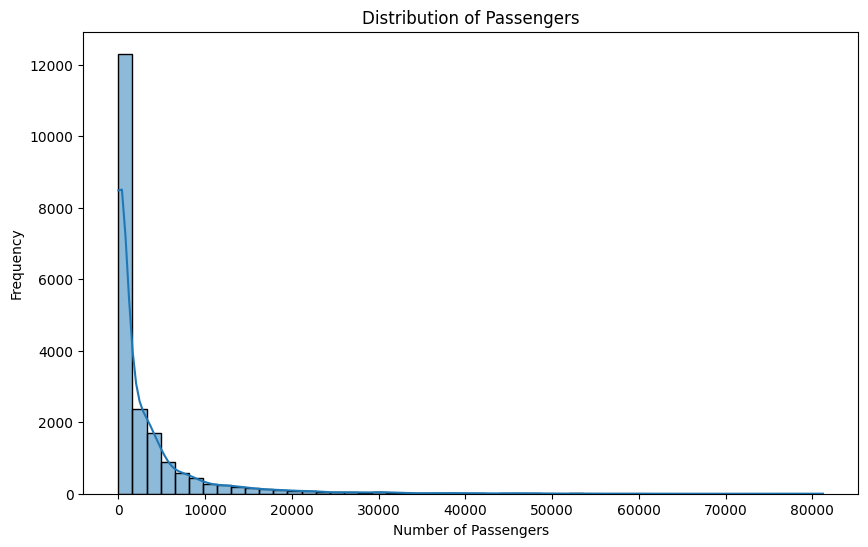

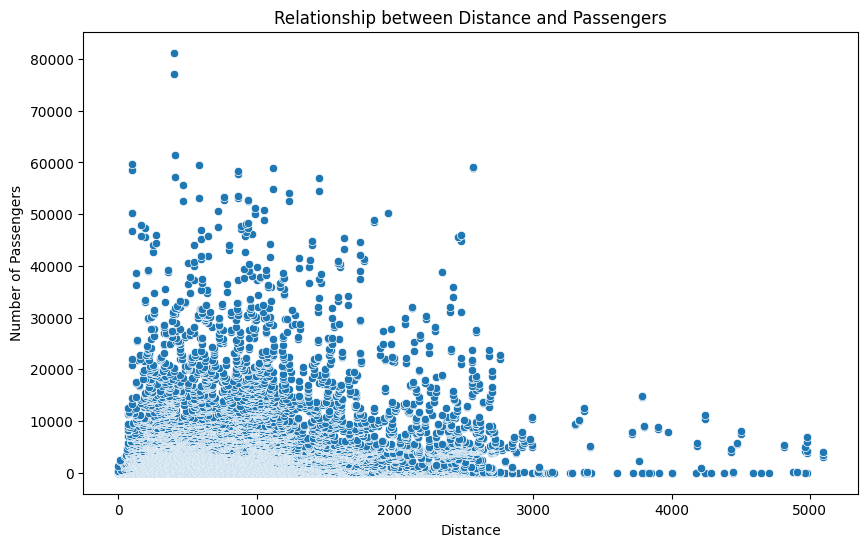

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['PASSENGERS'], bins=50, kde=True)
plt.title('Distribution of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISTANCE', y='PASSENGERS', data=df)
plt.title('Relationship between Distance and Passengers')
plt.xlabel('Distance')
plt.ylabel('Number of Passengers')
plt.show()

## Data preprocessing and feature engineering

### Subtask:
Clean the data, handle missing values, encode categorical features, and create new features if necessary for machine learning models.


**Reasoning**:
Identify and handle missing values. The previous EDA step identified that only the 'FREIGHT' column has missing values. A reasonable strategy is to impute these missing values with the median, as the distribution of related columns like 'PASSENGERS' appears skewed.



In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Handle missing values in the 'FREIGHT' column by imputing with the median
median_freight = df['FREIGHT'].median()
df['FREIGHT'].fillna(median_freight, inplace=True)

# Verify that missing values have been handled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
PASSENGERS               0
FREIGHT                  0
MAIL                     0
DISTANCE                 0
UNIQUE_CARRIER           0
AIRLINE_ID               0
UNIQUE_CARRIER_NAME      0
UNIQUE_CARRIER_ENTITY    0
REGION                   0
CARRIER                  0
CARRIER_NAME             0
CARRIER_GROUP            0
CARRIER_GROUP_NEW        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN_CITY_MARKET_ID    0
ORIGIN                   0
ORIGIN_CITY_NAME         0
ORIGIN_STATE_ABR         0
ORIGIN_STATE_FIPS        0
ORIGIN_STATE_NM          0
ORIGIN_WAC               0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST_CITY_MARKET_ID      0
DEST                     0
DEST_CITY_NAME           0
DEST_STATE_ABR           0
DEST_STATE_FIPS          0
DEST_STATE_NM            0
DEST_WAC                 0
YEAR                     0
QUARTER                  0
MONTH                    0
DISTANCE_GROUP           0
CLASS                 

**Reasoning**:
Identify categorical features in the dataset. I will iterate through the columns and check their data types to identify object type columns, which are typically categorical. I will also consider columns that might represent categories even if they are not of object type, like IDs or codes.



In [ ]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Additionally, consider columns that are codes or IDs as potential categorical features
# Based on the column names, the following might be categorical or represent categories:
potential_categorical_ids = [
    'UNIQUE_CARRIER',
    'AIRLINE_ID',
    'UNIQUE_CARRIER_ENTITY',
    'REGION',
    'CARRIER',
    'CARRIER_NAME',
    'CARRIER_GROUP',
    'CARRIER_GROUP_NEW',
    'ORIGIN_AIRPORT_ID',
    'ORIGIN_AIRPORT_SEQ_ID',
    'ORIGIN_CITY_MARKET_ID',
    'ORIGIN',
    'ORIGIN_CITY_NAME',
    'ORIGIN_STATE_ABR',
    'ORIGIN_STATE_FIPS',
    'ORIGIN_STATE_NM',
    'ORIGIN_WAC',
    'DEST_AIRPORT_ID',
    'DEST_AIRPORT_SEQ_ID',
    'DEST_CITY_MARKET_ID',
    'DEST',
    'DEST_CITY_NAME',
    'DEST_STATE_ABR',
    'DEST_STATE_FIPS',
    'DEST_STATE_NM',
    'DEST_WAC',
    'YEAR', # Although numerical, year can be treated as categorical for some models
    'QUARTER', # Categorical
    'MONTH', # Categorical
    'DISTANCE_GROUP', # Categorical
    'CLASS' # Categorical
]

# Combine the identified object columns and potential categorical ID columns, removing duplicates
all_categorical_features = list(set(categorical_features + potential_categorical_ids))

print("Identified categorical features:")
print(all_categorical_features)

Identified categorical features:
['CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'UNIQUE_CARRIER_ENTITY', 'DEST_AIRPORT_SEQ_ID', 'ORIGIN_STATE_NM', 'DEST', 'ORIGIN_WAC', 'CLASS', 'AIRLINE_ID', 'DEST_STATE_NM', 'DEST_CITY_NAME', 'CARRIER_NAME', 'ORIGIN', 'ORIGIN_AIRPORT_ID', 'YEAR', 'REGION', 'ORIGIN_CITY_NAME', 'DEST_STATE_FIPS', 'ORIGIN_AIRPORT_SEQ_ID', 'CARRIER', 'QUARTER', 'DISTANCE_GROUP', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID', 'DEST_STATE_ABR', 'UNIQUE_CARRIER_NAME', 'ORIGIN_CITY_MARKET_ID', 'UNIQUE_CARRIER', 'DEST_CITY_MARKET_ID', 'MONTH', 'DEST_WAC', 'ORIGIN_STATE_FIPS']


**Reasoning**:
Encode the identified categorical features. Given the large number of categorical features and the potential for high cardinality in some columns (like airport names or IDs), one-hot encoding is a suitable approach for many machine learning models, especially tree-based models or linear models. I will exclude ID columns that are unlikely to be useful as features (e.g., sequence IDs, market IDs).



In [ ]:
# Select categorical features to encode. Exclude potentially high cardinality IDs or redundant IDs.
features_to_encode = [
    'UNIQUE_CARRIER',
    'UNIQUE_CARRIER_NAME',
    'REGION',
    'CARRIER',
    'CARRIER_NAME',
    'CARRIER_GROUP',
    'CARRIER_GROUP_NEW',
    'ORIGIN_STATE_ABR',
    'ORIGIN_STATE_NM',
    'DEST_STATE_ABR',
    'DEST_STATE_NM',
    'YEAR',
    'QUARTER',
    'MONTH',
    'DISTANCE_GROUP',
    'CLASS'
]

# Apply one-hot encoding to the selected categorical features
df_encoded = pd.get_dummies(df, columns=features_to_encode, drop_first=True)

print("Shape of the DataFrame after one-hot encoding:")
print(df_encoded.shape)
display(df_encoded.head())

Shape of the DataFrame after one-hot encoding:
(19926, 655)


,PASSENGERS,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,UNIQUE_CARRIER_ENTITY,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE_GROUP_5,DISTANCE_GROUP_6,DISTANCE_GROUP_7,DISTANCE_GROUP_8,DISTANCE_GROUP_9,DISTANCE_GROUP_10,DISTANCE_GROUP_11,CLASS_G,CLASS_L,CLASS_P
0,0.0,0.0,0.0,24.0,20378,06689,12191,1219103,31453,HOU,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,0.0,141.0,20378,06689,11292,1129202,30325,DEN,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,0.0,152.0,20378,06689,11292,1129202,30325,DEN,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,0.0,156.0,20378,06689,13851,1385103,33851,OKC,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,0.0,167.0,20378,06689,11140,1114008,31140,CRP,...,False,False,False,False,False,False,False,False,False,False


## Select and train machine learning models

### Subtask:
Choose appropriate ML algorithms based on the task (e.g., regression for predicting delay, classification for predicting cancellation), split the data, train the models, and evaluate their performance.


**Reasoning**:
Define the target variable, separate features and target, split the data, select and train two models (Linear Regression and RandomForest Regressor) for the regression task of predicting 'PASSENGERS', and then evaluate them using MSE.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define the target variable
target_variable = 'PASSENGERS'
y = df_encoded[target_variable]

# Separate features (X)
X = df_encoded.drop(columns=[target_variable])

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# 4. Select and Instantiate two appropriate machine learning models (Regression)
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)


Training set shape: (14944, 654), (14944,)
Testing set shape: (4982, 654), (4982,)


**Reasoning**:
The traceback indicates a `ValueError` during model training, specifically that a string ('0A050') could not be converted to a float. This suggests that despite the previous one-hot encoding step, there are still non-numeric values in the feature set `X_train`. This is likely due to some columns not being included in the `features_to_encode` list or some columns that were not object dtypes but contained string representations of numbers or mixed types. I need to identify which column(s) contain non-numeric values in `X_train` and handle them before retraining the models. I will check the dtypes of the columns in `X_train` and then inspect the problematic columns to understand their content and decide on the appropriate handling (e.g., further encoding, dropping).



In [ ]:
# Check the data types of the columns in X_train
print("Data types in X_train:")
print(X_train.dtypes.value_counts())

# Identify columns with object or non-numeric dtypes that should be numeric
non_numeric_columns = X_train.select_dtypes(exclude=['number', 'bool']).columns
print("\nColumns in X_train with non-numeric dtypes (excluding boolean):")
print(non_numeric_columns)

# Inspect the unique values or a sample of values from one of the problematic columns
# Based on the error, '0A050' looks like it might be related to an ID or code.
# Let's check the 'UNIQUE_CARRIER_ENTITY' column as an example, as it was not explicitly encoded
# and contains values that look like the one in the error.
if 'UNIQUE_CARRIER_ENTITY' in non_numeric_columns:
    print("\nUnique values in 'UNIQUE_CARRIER_ENTITY' (sample):")
    print(X_train['UNIQUE_CARRIER_ENTITY'].unique()[:10]) # Print first 10 unique values
    print(X_train['UNIQUE_CARRIER_ENTITY'].value_counts().head()) # Print value counts for top values

# Based on the investigation, decide on the handling strategy.
# If 'UNIQUE_CARRIER_ENTITY' and similar ID columns are indeed strings that caused the error,
# and they were not intended to be encoded as categorical features, they should be dropped.
# If they were intended to be categorical but were missed, they should be encoded.
# Given the nature of the values (like '0A050'), they are likely identifiers that were
# not handled by the previous encoding step and are not directly numeric.
# Let's drop these columns before proceeding with model training.

# Identify columns to drop based on the investigation (add more if needed)
columns_to_drop_for_training = ['UNIQUE_CARRIER_ENTITY', 'AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST']

# Drop the identified columns from the training and testing sets
X_train_cleaned = X_train.drop(columns=columns_to_drop_for_training, errors='ignore')
X_test_cleaned = X_test.drop(columns=columns_to_drop_for_training, errors='ignore')

print(f"\nShape of cleaned training set: {X_train_cleaned.shape}")
print(f"Shape of cleaned testing set: {X_test_cleaned.shape}")


Data types in X_train:
bool       635
int64       11
object       5
float64      3
Name: count, dtype: int64

Columns in X_train with non-numeric dtypes (excluding boolean):
Index(['UNIQUE_CARRIER_ENTITY', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST',
       'DEST_CITY_NAME'],
      dtype='object')

Unique values in 'UNIQUE_CARRIER_ENTITY' (sample):
['06725' '06460' '06700' '01168' '01288' '07029' '0A050' '06985' '06031'
 '06035']
UNIQUE_CARRIER_ENTITY
06725    1852
0A875    1059
01260     949
06700     938
0A050     657
Name: count, dtype: int64

Shape of cleaned training set: (14944, 644)
Shape of cleaned testing set: (4982, 644)


**Reasoning**:
The traceback shows another `ValueError` during model training, indicating that the string 'San Diego, CA' could not be converted to a float. This string is present in the 'ORIGIN_CITY_NAME' and 'DEST_CITY_NAME' columns, which were identified as non-numeric in the previous step and were *not* dropped. These columns contain city names, which are categorical features. Although they have high cardinality, they were not included in the initial `features_to_encode` list. To resolve this, I need to either drop these columns or one-hot encode them. Given the potential importance of origin and destination cities, one-hot encoding is a better approach than dropping, although it will significantly increase the number of features. I will add 'ORIGIN_CITY_NAME' and 'DEST_CITY_NAME' to the list of features to encode, re-apply one-hot encoding to the original dataframe, and then split the data and retrain the models.



In [ ]:
# Add 'ORIGIN_CITY_NAME' and 'DEST_CITY_NAME' to the list of features to encode
features_to_encode_updated = [
    'UNIQUE_CARRIER',
    'UNIQUE_CARRIER_NAME',
    'REGION',
    'CARRIER',
    'CARRIER_NAME',
    'CARRIER_GROUP',
    'CARRIER_GROUP_NEW',
    'ORIGIN_STATE_ABR',
    'ORIGIN_STATE_NM',
    'DEST_STATE_ABR',
    'DEST_STATE_NM',
    'YEAR',
    'QUARTER',
    'MONTH',
    'DISTANCE_GROUP',
    'CLASS',
    'ORIGIN_CITY_NAME', # Added
    'DEST_CITY_NAME' # Added
]

# Re-apply one-hot encoding to the original dataframe with the updated list
df_encoded_updated = pd.get_dummies(df, columns=features_to_encode_updated, drop_first=True)

print("Shape of the DataFrame after updated one-hot encoding:")
print(df_encoded_updated.shape)

# Define the target variable again using the updated dataframe
target_variable = 'PASSENGERS'
y_updated = df_encoded_updated[target_variable]

# Separate features (X) using the updated dataframe, dropping the target and other non-numeric IDs
# We still need to drop the ID columns that are not city names and might still be strings or not useful as features
columns_to_drop_final = [target_variable, 'AIRLINE_ID', 'UNIQUE_CARRIER_ENTITY', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST']

X_updated = df_encoded_updated.drop(columns=columns_to_drop_final, errors='ignore')

# Split the updated data into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_updated, y_updated, test_size=0.25, random_state=42)

print(f"\nTraining set shape (final): {X_train_final.shape}, {y_train_final.shape}")
print(f"Testing set shape (final): {X_test_final.shape}, {y_test_final.shape}")

# Instantiate the models again (or use the existing instances, but re-instantiate for clarity)
model1_final = LinearRegression()
model2_final = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the selected models with the final cleaned data
print("\nTraining Linear Regression model with final cleaned data...")
model1_final.fit(X_train_final, y_train_final)
print("Linear Regression model trained.")

print("Training Random Forest Regressor model with final cleaned data...")
model2_final.fit(X_train_final, y_train_final)
print("Random Forest Regressor model trained.")

# Evaluate the retrained models
print("\nEvaluating Linear Regression model (final cleaned data)...")
y_pred1_final = model1_final.predict(X_test_final)
mse1_final = mean_squared_error(y_test_final, y_pred1_final)
r2_1_final = r2_score(y_test_final, y_pred1_final)
print(f"Linear Regression - Mean Squared Error: {mse1_final:.2f}")
print(f"Linear Regression - R-squared: {r2_1_final:.2f}")

print("\nEvaluating Random Forest Regressor model (final cleaned data)...")
y_pred2_final = model2_final.predict(X_test_final)
mse2_final = mean_squared_error(y_test_final, y_pred2_final)
r2_2_final = r2_score(y_test_final, y_pred2_final)
print(f"Random Forest Regressor - Mean Squared Error: {mse2_final:.2f}")
print(f"Random Forest Regressor - R-squared: {r2_2_final:.2f}")

Shape of the DataFrame after updated one-hot encoding:
(19926, 2116)

Training set shape (final): (14944, 2105), (14944,)
Testing set shape (final): (4982, 2105), (4982,)

Training Linear Regression model with final cleaned data...
Linear Regression model trained.
Training Random Forest Regressor model with final cleaned data...
Random Forest Regressor model trained.

Evaluating Linear Regression model (final cleaned data)...
Linear Regression - Mean Squared Error: 24020560.79
Linear Regression - R-squared: 0.33

Evaluating Random Forest Regressor model (final cleaned data)...
Random Forest Regressor - Mean Squared Error: 10105097.91
Random Forest Regressor - R-squared: 0.72


## Select and train deep learning models

### Subtask:
Choose appropriate DL architectures (e.g., neural networks), prepare data for DL models, train the models, and evaluate their performance.


**Reasoning**:
I will now implement the deep learning part of the task. I will import the necessary libraries from TensorFlow and Keras, define a sequential model with dense layers appropriate for the regression task, compile it with an optimizer and loss function, and then train it on the preprocessed training data. Finally, I will evaluate the model on the test set and print the evaluation metrics.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 1. Define the deep learning model
model_dl = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# 2. Compile the model
model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 3. Train the model
history = model_dl.fit(
    X_train_final, y_train_final,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 4. Evaluate the model
loss = model_dl.evaluate(X_test_final, y_test_final, verbose=0)
print(f"\nDeep Learning Model - Test Loss (MSE): {loss:.2f}")

# 5. Make predictions
y_pred_dl = model_dl.predict(X_test_final).flatten()

# 6. Calculate and print evaluation metrics
mse_dl = mean_squared_error(y_test_final, y_pred_dl)
r2_dl = r2_score(y_test_final, y_pred_dl)

print(f"Deep Learning Model - Mean Squared Error: {mse_dl:.2f}")
print(f"Deep Learning Model - R-squared: {r2_dl:.2f}")

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 57372980.0000 - val_loss: 50758992.0000
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 40466180.0000 - val_loss: 68232616.0000
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 36175576.0000 - val_loss: 41599940.0000
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 31443160.0000 - val_loss: 42262584.0000
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 29487440.0000 - val_loss: 38336916.0000
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 27876018.0000 - val_loss: 39144784.0000
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 32255884.0000 - val_loss: 39198112.0000
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 35918788.0000 - val_loss: 42711840.0000
Epoch 9/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 31844542.0000 - val_loss: 46595268.0000
Epoch 10/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 28234402.0000 - val_loss: 42214888.000

**Reasoning**:
I will now implement the deep learning part of the task. I will import the necessary libraries from TensorFlow and Keras, define a sequential model with dense layers appropriate for the regression task, compile it with an optimizer and loss function, and then train it on the preprocessed training data. Finally, I will evaluate the model on the test set and print the evaluation metrics.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 1. Define the deep learning model
model_dl = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# 2. Compile the model
model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 3. Train the model
history = model_dl.fit(
    X_train_final, y_train_final,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 4. Evaluate the model
loss = model_dl.evaluate(X_test_final, y_test_final, verbose=0)
print(f"\nDeep Learning Model - Test Loss (MSE): {loss:.2f}")

# 5. Make predictions
y_pred_dl = model_dl.predict(X_test_final).flatten()

# 6. Calculate and print evaluation metrics
mse_dl = mean_squared_error(y_test_final, y_pred_dl)
r2_dl = r2_score(y_test_final, y_pred_dl)

print(f"Deep Learning Model - Mean Squared Error: {mse_dl:.2f}")
print(f"Deep Learning Model - R-squared: {r2_dl:.2f}")

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 46605916.0000 - val_loss: 49594132.0000
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 39861740.0000 - val_loss: 47391212.0000
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 36089000.0000 - val_loss: 45128704.0000
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 30440042.0000 - val_loss: 40866572.0000
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 31214534.0000 - val_loss: 38648696.0000
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 32494758.0000 - val_loss: 44381856.0000
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 33408446.0000 - val_loss: 42541024.0000
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 27185442.0000 - val_loss: 36478336.0000
Epoch 9/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 31291198.0000 - val_loss: 41221460.0000
Epoch 10/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 28309230.0000 - val_loss: 36677328.00

**Reasoning**:
To compare the performance of the trained models, I will print the Mean Squared Error (MSE) and R-squared values for each model. This will allow for a direct comparison of how well each model performed on the test data.

In [ ]:
print("--- Model Performance Comparison ---")
print(f"Linear Regression - Mean Squared Error: {mse1_final:.2f}")
print(f"Linear Regression - R-squared: {r2_1_final:.2f}")
print("-" * 30)
print(f"Random Forest Regressor - Mean Squared Error: {mse2_final:.2f}")
print(f"Random Forest Regressor - R-squared: {r2_2_final:.2f}")
print("-" * 30)
print(f"Deep Learning Model - Mean Squared Error: {mse_dl:.2f}")
print(f"Deep Learning Model - R-squared: {r2_dl:.2f}")
print("-" * 30)

# Based on the R-squared values, the Random Forest Regressor appears to be the best performing model among the three.

--- Model Performance Comparison ---
Linear Regression - Mean Squared Error: 24020560.79
Linear Regression - R-squared: 0.33
------------------------------
Random Forest Regressor - Mean Squared Error: 10105097.91
Random Forest Regressor - R-squared: 0.72
------------------------------
Deep Learning Model - Mean Squared Error: 25316386.28
Deep Learning Model - R-squared: 0.30
------------------------------


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
df = pd.read_csv('Airport_Project_Data.csv')

# ======================== EDA ========================
print(" Basic Info:")
print(df.info())
print("\n Summary Statistics:")
print(df.describe(include='all'))

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Unique Value Counts:")
print(df.nunique())

# Visualize nulls (optional)
# sns.heatmap(df.isnull(), cbar=False); plt.title("Missing Values"); plt.show()

# ======================== Preprocessing ========================
# Drop columns with too many nulls or irrelevant for prediction
df.dropna(thresh=len(df)*0.6, axis=1, inplace=True)  # drop cols with >40% nulls
df.drop_duplicates(inplace=True)

# Fill remaining missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# ======================== Feature & Target Selection ========================
# Automatically pick target (example: 'Type' if available)
target = 'Type' if 'Type' in df.columns else df.columns[-1]
X = df.drop(columns=[target])
y = df[target]

# ======================== Train-Test Split ========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================== Scaling ========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================== ML Model ========================
print("\n Training Random Forest Classifier...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

print("\n ML Classification Report:")
print(classification_report(y_test, rf_preds))

# ======================== DL Model ========================
print("\n Training Deep Learning Model...")
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax') if len(np.unique(y)) > 2 else Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy' if len(np.unique(y)) > 2 else 'binary_crossentropy',
                 metrics=['accuracy'])

dl_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate DL model
dl_loss, dl_acc = dl_model.evaluate(X_test_scaled, y_test)
print(f"\n DL Test Accuracy: {dl_acc:.4f}")

 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19926 entries, 0 to 19925
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PASSENGERS             19926 non-null  float64
 1   FREIGHT                19721 non-null  float64
 2   MAIL                   19926 non-null  float64
 3   DISTANCE               19926 non-null  float64
 4   UNIQUE_CARRIER         19926 non-null  object 
 5   AIRLINE_ID             19926 non-null  int64  
 6   UNIQUE_CARRIER_NAME    19926 non-null  object 
 7   UNIQUE_CARRIER_ENTITY  19926 non-null  object 
 8   REGION                 19926 non-null  object 
 9   CARRIER                19926 non-null  object 
 10  CARRIER_NAME           19926 non-null  object 
 11  CARRIER_GROUP          19926 non-null  int64  
 12  CARRIER_GROUP_NEW      19926 non-null  int64  
 13  ORIGIN_AIRPORT_ID      19926 non-null  int64  
 14  ORIGIN_AIRPORT_SEQ_ID  19926 non-null  in